<img src="https://gitlab.com/bivl2ab/academico/macv/semillero-uis-2020-2/-/raw/master/img/Banner_Logo.jpeg" alt="Drawing" style="width:700px;">

# <font color='red'>**Deep learning**</font>

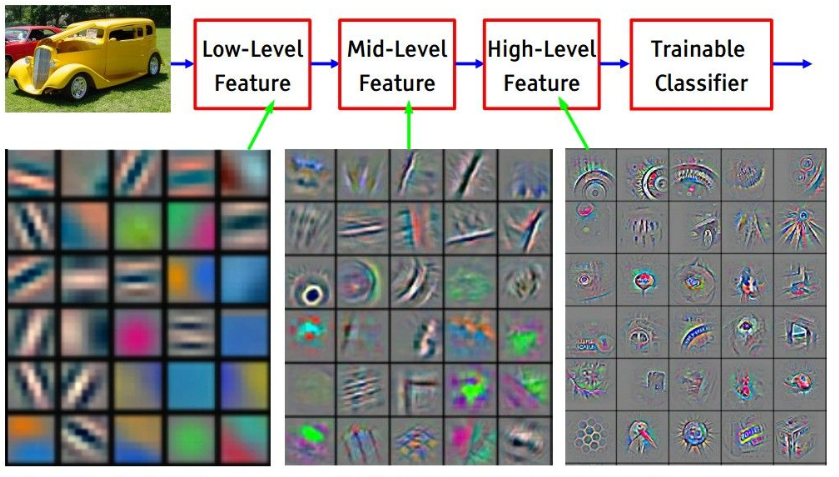

# <font color='red'>**Let's practice in natural domain!**</font>

- We will use CIFAR10:
    - 50k TRAINING IMAGES
    - 10k TESTING IMAGES
    - images are 32X32 images by 3 channels

https://www.cs.toronto.edu/~kriz/cifar.html

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])
print("CIFAR 10")
print("==== train info ===")
print("samples: {}, labels: {}".format(x_train.shape, y_train.shape))
print("==== test info ===")
print("samples: {}, labels: {}".format(x_test.shape, y_test.shape))

CIFAR 10
==== train info ===
samples: (50000, 32, 32, 3), labels: (50000,)
==== test info ===
samples: (10000, 32, 32, 3), labels: (10000,)


Because limitation on course computers, we will reduce again the CIFAR-10, to CIFAR-3 and test our approach.
redefine train and test sets, from CIFAR-10, taking only 3 actions.

In [4]:
y_te, x_te = [], []
y_tr, x_tr = [], []

for i, data in enumerate(y_train):
    if(data == 3): # cat
        x_tr.append(x_train[i])
        y_tr.append(0)
    elif(data == 5): # dog
        x_tr.append(x_train[i])
        y_tr.append(2)
    elif(data == 7): # horse
        x_tr.append(x_train[i])
        y_tr.append(1)

y_tr = np.array(y_tr)
x_tr = np.array(x_tr)
        
for i, data in enumerate(y_test):
    if(data == 3): # cat
        x_te.append(x_test[i])
        y_te.append(0)
    elif(data == 5): # dog
        x_te.append(x_test[i])
        y_te.append(2)
    elif(data == 7): # horse
        x_te.append(x_test[i])
        y_te.append(1)

y_te = np.array(y_te)
x_te = np.array(x_te)

print("test labels: {}, test samples: {}, train labels: {}, train samples: {}".format(y_te.shape, x_te.shape, y_tr.shape, x_tr.shape))

test labels: (3000,), test samples: (3000, 32, 32, 3), train labels: (15000,), train samples: (15000, 32, 32, 3)


**Our labels are now:**
* 0: cat
* 1: horse
* 2: dog

In [5]:
labels = {0: 'cat',
          1: 'horse',
          2: 'dog'}

Some visual examples:

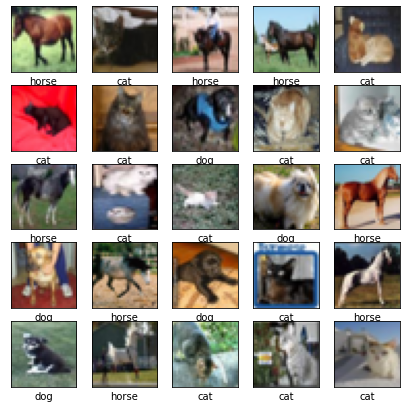

In [6]:
plt.figure(figsize=(7,7))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_tr[i])
  plt.xlabel(labels[y_tr[i]])

In [7]:
x_tr = x_tr.astype('float32')
x_te = x_te.astype('float32')

x_tr /= 255
x_te /= 255
print('x_train shape:', x_tr.shape)
print('Number of images in x_train', x_tr.shape[0])
print('Number of images in x_test', x_te.shape[0])

x_train shape: (15000, 32, 32, 3)
Number of images in x_train 15000
Number of images in x_test 3000


#<font color='red'>**My first dense neural network (DNN)**</font>

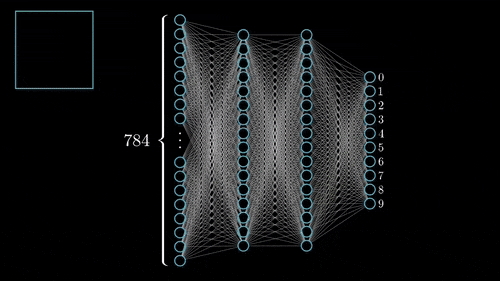

In [8]:
my_input = keras.layers.Input(shape=(32, 32, 3))
x = keras.layers.Flatten()(my_input)
x = keras.layers.Dense(units=1024, activation='relu')(x)
x = keras.layers.Dense(units=512, activation='relu')(x)
my_output = keras.layers.Dense(units=3, activation='softmax')(x)

my_dnn = keras.Model(my_input, my_output)

In [9]:
my_dnn.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3146752   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 1539      
Total params: 3,673,091
Trainable params: 3,673,091
Non-trainable params: 0
_________________________________________________________________


In [10]:
opt = keras.optimizers.Adam(learning_rate=0.001)
my_dnn.compile(optimizer=opt, loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [11]:
history = my_dnn.fit(x_tr, y_tr, epochs=10, batch_size=32, validation_data=(x_te, y_te))

Epoch 1/10
469/469 [==============================] - 6s 6ms/step - loss: 1.0227 - accuracy: 0.4920 - val_loss: 0.9351 - val_accuracy: 0.5193
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.9239 - accuracy: 0.5347 - val_loss: 0.8994 - val_accuracy: 0.5470
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.8826 - accuracy: 0.5658 - val_loss: 0.8645 - val_accuracy: 0.5843
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.8625 - accuracy: 0.5800 - val_loss: 0.8917 - val_accuracy: 0.5590
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.8519 - accuracy: 0.5877 - val_loss: 0.8510 - val_accuracy: 0.5890
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.8325 - accuracy: 0.5957 - val_loss: 0.8456 - val_accuracy: 0.5930
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.8251 - accuracy: 0.6018 - val_loss: 0.8550 - val_accuracy: 0.5807
Epoch 

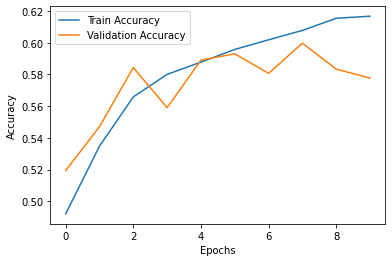

In [12]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# <font color='red'>**Testing our model**</font>

In [14]:
def model_evaluate(model, imgs_test, labels_test):
  test_loss, test_acc = model.evaluate(imgs_test, labels_test)
  print('Test accuracy:', test_acc)

In [14]:
model_evaluate(my_dnn, x_te, y_te)

94/94 [==============================] - 0s 4ms/step - loss: 0.8632 - accuracy: 0.5777
Test accuracy: 0.5776666402816772


**My model in test data**

In [56]:
predictions = my_dnn.predict(x_te)
print("predictions shape: ", predictions.shape)

predictions shape:  (3000, 3)


**Predicting single image**

Text(0.5, 1.0, 'dog')

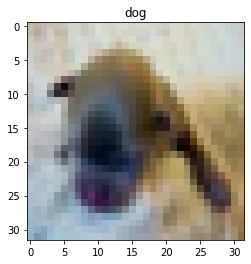

In [57]:
idx = 2700
plt.imshow(x_te[idx])
plt.title(labels[y_te[idx]])

In [58]:
print(predictions[idx])
print("valor predicho:", labels[np.argmax(predictions[idx])], "max prob: ", np.max(predictions[idx]), "ground truth: ", labels[y_te[idx]])

[0.5942567  0.06218075 0.3435626 ]
valor predicho: cat max prob:  0.5942567 ground truth:  dog


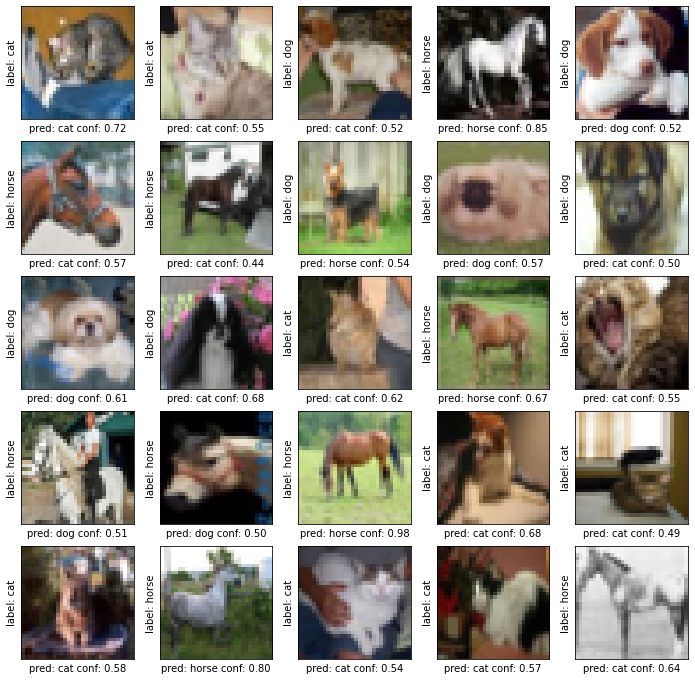

In [59]:
plt.figure(figsize=(12,12))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_te[i])
  plt.xlabel("pred: {} conf: {}".format(labels[np.argmax(predictions[i])],"%0.2f"%np.max(predictions[i])))
  plt.ylabel("label: {}".format(labels[y_te[i]]))

<font color='purple'>**Student challenge**</font>
1. What happens if we add more neurons (units)?
2. If we add more dense layers?
3. How about mix the previous ideas?

# **We can do better!**

# <font color='red'>**Making my first CNN**</font>

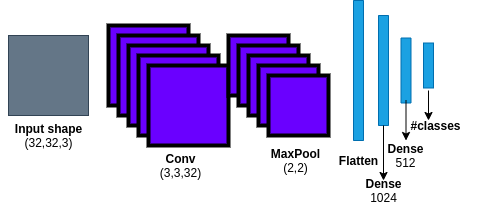

In [40]:
my_input = keras.layers.Input(shape=(32, 32, 3))
x = keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(my_input)
x = keras.layers.MaxPool2D(pool_size=(2,2))(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(units=1024, activation='relu')(x)
x = keras.layers.Dense(units=512, activation='relu')(x)
my_output = keras.layers.Dense(units=3, activation='softmax')(x)

my_cnn = keras.Model(my_input, my_output)

In [41]:
my_cnn.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1152)              0   

In [42]:
opt = keras.optimizers.Adam(learning_rate=0.001)
my_cnn.compile(optimizer=opt, loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [43]:
history = my_cnn.fit(x_tr, y_tr, epochs=10, batch_size=32, validation_data=(x_te, y_te))

Epoch 1/10
469/469 [==============================] - 6s 11ms/step - loss: 0.8917 - accuracy: 0.5577 - val_loss: 0.8067 - val_accuracy: 0.6123
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.7242 - accuracy: 0.6649 - val_loss: 0.7164 - val_accuracy: 0.6820
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.6395 - accuracy: 0.7148 - val_loss: 0.6316 - val_accuracy: 0.7223
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.5708 - accuracy: 0.7501 - val_loss: 0.6100 - val_accuracy: 0.7330
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.4882 - accuracy: 0.7931 - val_loss: 0.6155 - val_accuracy: 0.7383
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.3860 - accuracy: 0.8409 - val_loss: 0.6865 - val_accuracy: 0.7337
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2781 - accuracy: 0.8905 - val_loss: 0.8291 - val_accuracy: 0.7177
Epoc

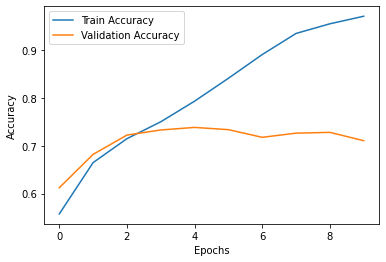

In [44]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#<font color='red'>**Testing our model**</font>

In [45]:
model_evaluate(my_cnn, x_te, y_te)

94/94 [==============================] - 0s 5ms/step - loss: 1.3038 - accuracy: 0.7107
Test accuracy: 0.7106666564941406


**Predicting...**

In [120]:
predictions = my_cnn.predict(x_te)
print("predictions shape: ", predictions.shape)

predictions shape:  (3000, 3)


**Over single sample**

Text(0.5, 1.0, 'dog')

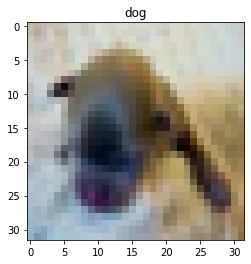

In [121]:
idx = 2700
plt.imshow(x_te[idx])
plt.title(labels[y_te[idx]])

In [122]:
print(predictions[idx])
print("valor predicho:", labels[np.argmax(predictions[idx])], "max prob: ", np.max(predictions[idx]), "ground truth: ", labels[y_te[idx]])

[0.00452216 0.9412813  0.05419648]
valor predicho: horse max prob:  0.9412813 ground truth:  dog


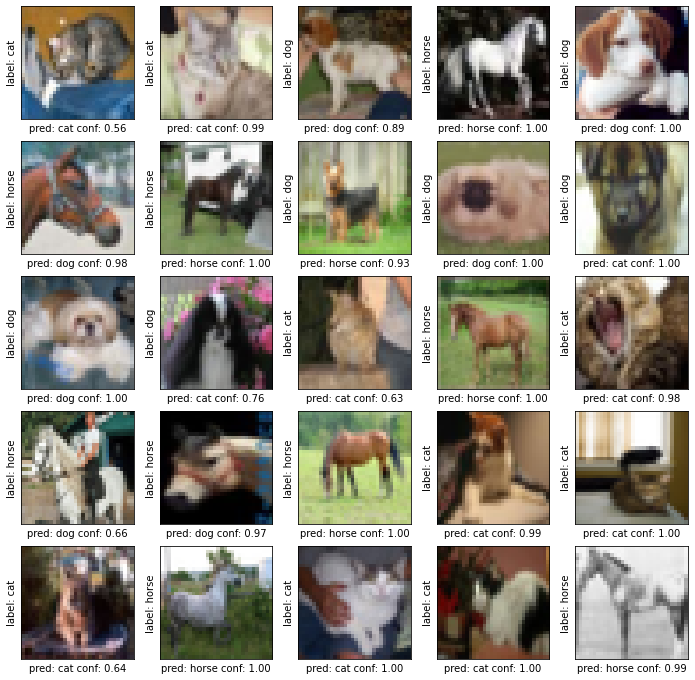

In [123]:
plt.figure(figsize=(12,12))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_te[i])
  plt.xlabel("pred: {} conf: {}".format(labels[np.argmax(predictions[i])],"%0.2f"%np.max(predictions[i])))
  plt.ylabel("label: {}".format(labels[y_te[i]]))

<font color='purple'>**Student challenge**</font>
1. What happens if we add more filters?
2. If we add more convolutional layers?
3. If we make bigger filters?
4. How about mix the previous ideas?

**Proving with external data...**

<class 'PIL.Image.Image'>
(1, 32, 32, 3)


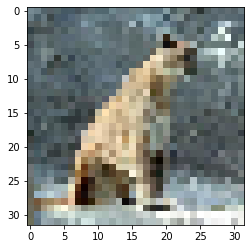

In [ ]:
filename = '/content/drive/MyDrive/workshop/image_set/cougar_body/image_0001.jpg'
im_gere = tf.keras.utils.load_img(filename, target_size=(32, 32))
print  (type(im_gere))
ima_gere = tf.keras.preprocessing.image.array_to_img(im_gere)
ima_gere = np.expand_dims(ima_gere, axis=0);
print(ima_gere.shape)
plt.imshow(im_gere);

In [ ]:
pred = my_cnn.predict(ima_gere)
print("pred: {} conf: {}".format(np.argmax(pred),"%0.2f"%np.max(pred)))

pred: 1 conf: 1.00


## Referencias

[1.]   Understanding Convolutions and Pooling for Deep Learning: https://towardsdatascience.com/understanding-convolutions-and-pooling-in-neural-networks-a-simple-explanation-885a2d78f211 

[2.] Cifar 10 in tensorflow: https://www.tensorflow.org/tutorials/images/cnn


<img src="https://gitlab.com/bivl2ab/academico/macv/semillero-uis-2020-2/-/raw/master/img/thanks.jpg" style="width:700px;">

